#  Arabic Tweets Sentiment Analysis

In this work we will buid a machine learnign model to classify tweets related to Saudi telecom comapnies based on the customer sentiment.

this technical report will cover the following steps:

- Data collection.
- Data preparing.
- Data pre-processing.
- Data labeling
- Model training.
- Model evaluation. 

## Data Collection

In this work we will colloct data from Twitter by using Twitter API. We aim to colloct tweets ralted to the biggest three telecom companies in Saudi Arabia, which are:

- STC
- Mobily
- Zain

we collect those data by using the following search queries:

- "STC" to collect STC data.
- "موبايلي" to collect mobily data.
- "شركة زين" to collect zain data.

first of all, we call the important Python packages that will be used in this work

In [1]:
#أستدعاء المكتبات 
import tweepy    #مكتبة تويبي للربط مع تويتر وجمع البيانات
import pandas as pd  #  مكتبة بانداز للتعامل مع الجداول والداتافريم
import re  # هذه المكتبة سوف نستعملها في ازالة الرموز 
import jsonpickle #  لتحويل البيانات التي يتم جلبها من تويتر الى صيغة json 
import string # مكتبة سترينق للتعامل مع النصوص 

C:\Users\walsa\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\walsa\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\walsa\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


configure Twitter API connection, to be able to collect data from Twitter API we need to show that we authorized to access Tweeter API and that can be done by sending our consumer key, consumer  secret, access token, and access secret

In [2]:
# مفاتيح الدخول على تويتر اي بي اي 
CONSUMER_KEY = 'ZSDj9mNN79hLmiflJvz213g1K'
CONSUMER_SECRET = '5UHcS1S3bLdOOWRS0uNUQufiOlbrXxuan8b93iU3gJCHtFdKsE'
ACCESS_TOKEN = '3355371525-wJcqAJVOqbBup6Gz9nXM6Ckx69Uc1xjpUsQpix1'
ACCESS_SECRET = 'B1KBI9ytPN8WBCKtNb7eTO0EToXXPqM3EiRXauX36dLpP'

# Setup access API
# تجهيز او تعريف كود الدخول على تويتر اي بي اي 
# ومن خلاله سوف يتم تمرير مفاتيح الدخول 
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api
 
# Create API object
# انشاء اتصال مع تويتر اي بي اي 
api = connect_to_twitter_OAuth()  

Now we authorized to collect data from Twitter API, the next step is to send the search queries to Twitter API to collect tweets and its metadata that related to those search queries.

We send several search queries for each company. the data has been collected on 13 APR 2020. 

In the following script we collect tweets related to STC company, we ask twitter API to return 200 Arabic tweets related to STC  

In [3]:
# الكلمة او الهاشاتاق الذي سوف يتم البحث عنه
query = 'stc'

# عدد التغريدات التي سوف يتم جلبها 
max_tweets = 200
# لغة التغريدات
lang= 'ar'

# إنشاء قائمة فارغة وسوف يتم تعبئتها بالتغريدات والمعلومات المهمه لنا 
tweet_list = []

# ارسال طلب لتويتر اي بي اي متضمن كلمة البحث وعدد التغريدات المطلوبة و اللغة 
# وتويتر بدوره سوف يعطينا التغريدات حسب المطلوب
tweets_collected = tweepy.Cursor(api.search,q=query,lang=lang).items(max_tweets)

## تحويل الملف الى صيغة 
## json 
## لكي يتم فيما بعد تحويلها الى جدول 
for tweet in tweets_collected:         

    #Convert to JSON format
    tweettosave = jsonpickle.encode(tweet._json, unpicklable=False).encode('utf-8')
    tweet_list.append(tweettosave)
    
stc_list = tweet_list

In the following script we collect tweets related to Mobily company, we ask twitter API to return 200 Arabic tweets related to Mobily

In [4]:
# الكلمة او الهاشاتاق الذي سوف يتم البحث عنه
query = 'موبايلي'

# عدد التغريدات التي سوف يتم جلبها 
max_tweets = 200
# لغة التغريدات
lang= 'ar'

# إنشاء قائمة فارغة وسوف يتم تعبئتها بالتغريدات والمعلومات المهمه لنا 
tweet_list = []

# ارسال طلب لتويتر اي بي اي متضمن كلمة البحث وعدد التغريدات المطلوبة و اللغة 
# وتويتر بدوره سوف يعطينا التغريدات حسب المطلوب
tweets_collected = tweepy.Cursor(api.search,q=query,lang=lang).items(max_tweets)

## تحويل الملف الى صيغة 
## json 
## لكي يتم فيما بعد تحويلها الى جدول 
for tweet in tweets_collected:         

    #Convert to JSON format
    tweettosave = jsonpickle.encode(tweet._json, unpicklable=False).encode('utf-8')
    tweet_list.append(tweettosave)
    
mobily_list = tweet_list

In the following script we collect tweets related to Zain company, we ask twitter API to return 200 Arabic tweets related to Zain

In [5]:
# الكلمة او الهاشاتاق الذي سوف يتم البحث عنه
query = 'شركة زين'

# عدد التغريدات التي سوف يتم جلبها 
max_tweets = 200
# لغة التغريدات
lang= 'ar'

# إنشاء قائمة فارغة وسوف يتم تعبئتها بالتغريدات والمعلومات المهمه لنا 
tweet_list = []

# ارسال طلب لتويتر اي بي اي متضمن كلمة البحث وعدد التغريدات المطلوبة و اللغة 
# وتويتر بدوره سوف يعطينا التغريدات حسب المطلوب
tweets_collected = tweepy.Cursor(api.search,q=query,lang=lang).items(max_tweets)

## تحويل الملف الى صيغة 
## json 
## لكي يتم فيما بعد تحويلها الى جدول 
for tweet in tweets_collected:         

    #Convert to JSON format
    tweettosave = jsonpickle.encode(tweet._json, unpicklable=False).encode('utf-8')
    tweet_list.append(tweettosave)
    
zain_list = tweet_list

## Data preparing

Twitter API return a json files contains the coolected tweets and its metadata. To deal with our tata we need to convert it to DataFrame and proccess it with PANDAS ,the popular python package to deal with dataframes.

The following script define function to convert our data to dataframe. Twitter return a lot of data, we extract the important data such as tweet text, tweet time, user name, and hastags included in tweet. 

In [6]:
# هذه الفنكشن سوف تعرف الاعمدة التي سوف تكون في الجدول الي راح يكون فيه التغريدات
# والبيانات المرتبطه بها مثل الوقت ونوع الجهاز الذي تم التغريد منه

def tweets_to_df(tweets):
    text = [] # قائمة فارغة سوف يتم ملئها بنص التغريدة 
    weekday = []# اليوم الذي تم التغريد فيه
    month = []# الشهر الذي تم التغريد فيه
    day = []# تاريخ التغريده 
    hour = []# ساعة التغريدة 
    hashtag = []# الهاشتاقات المرفقة في التغريدة 
    url = []# الروابط المرفقة في التغريدة 
    favorite = [] # عدد الإعجابات
    reply = [] # هل التغريدة رد على تغريدة اخرى او لا
    retweet = [] # عدد الريتويت على التغريدة
    follower = [] # عدد المتابعين للمغرد
    following = [] # عدد الحسابات التي يتابعها المغرد
    user = [] # رقم حساب المغرد
    screen_name = [] # اسم المغرد
    source = [] # الجهاز او التطبيق الذي تم التغريد من خلاله
    in_reply_to_screen_name = [] # اذا  كانت التغريدة رد على تغريدة أخرى هنا يظهر اسم الحساب الذي يتم الرد عليه
    tweet_hashtags = []   #make an empty list
    # تكرار راح يمشي على التغريدات تغريدة تغريدة ويضيف البيانات للاعمدة السابقة 
    for t in tweets:
        t = jsonpickle.decode(t) # راح يتم قراءة بيانات التغريدة كاملة 
        
        # Text
        text.append(t['text']) # راح يدخل في القائمة نصوص التغريدات
        
        # Decompose date
        date = t['created_at'] # هنا راح يقراء تاريخ التغريدة كامل ومنه راح يستخرج الاربعه الاسطر الي في الاسفل 
        weekday.append(date.split(' ')[0])# يستخرج يوم الاسبوع
        month.append(date.split(' ')[1])# الشهر
        day.append(date.split(' ')[2])# تاريخ اليوم الذي تم التغريد فيه
        
        time = date.split(' ')[3].split(':')# من الوقت يستخرج الساعة ويتجاهل البيانات الاخرى مثل الدقائق والثواني
        hour.append(time[0]) # يدخل ساعه التغريد على قائمة الساعه
        
        # Has hashtag   #    اذا لم يكون هناك هاشتاق فسوف يرجع 0 
        if len(t['entities']['hashtags']) == 0:            
            hashtag.append(0)
        else:
            hashtag.append(1)
            
        # Has url
        if len(t['entities']['urls']) == 0: # اذا لم يكن هناك رابط فسوف يرجع 0 واذا كان هناك رابط الكتروني في التغريدة فسوف يرجع 1
            url.append(0)
        else:
            url.append(1)
            
        # Number of favs
        favorite.append(t['favorite_count'])# سوف يتم اضافة عدد اللايكات لكل تغريدة
        
        # Is reply?
        if t['in_reply_to_status_id'] == None: # اذا كانت التغريدة ليست رد على تغريدة سابقة سوف يرجع 0 غير ذلك سوف يرجع العدد 1
            reply.append(0)
        else:
            reply.append(1)       
        
        # Retweets count
        retweet.append(t['retweet_count']) # عدد الريتويت لكل تغريدة
        
        # Followers number
        follower.append(t['user']['followers_count'])# سوف يضيف عدد المتابعين لكل مغرد 
        
        # Following number
        following.append(t['user']['friends_count']) # سوف يضيف عدد الحسابات الذين يتابعههم المغرد
        
        # Add user
        user.append(t['user']['name'])# يضيف رقم حساب المغرد

        # Add screen name
        screen_name.append(t['user']['screen_name'])# سوف يضيف اسم المغرد
        # Add sourse
        source.append(t['source'])# سوف يضيف مصدر التغريدة
        in_reply_to_screen_name.append(t['in_reply_to_screen_name'])# سوف يضيف اسم الحساب الذي كانت التغريد رد على تغريدتة
                                                                    # في حالة ان التغريدة رد على تغريدة اخرى
        
        newhastags= [] #هنا قائمة فارغة سوف يتم إضافة الهاشتاقات لكل تغريدة
        for tweetHashtag in t["entities"]["hashtags"]:    #iterate over the list
            newhastags.append(tweetHashtag["text"])
        tweet_hashtags.append(newhastags)
        
        # هنا سوف يضيف جميع الاعمدة المطلوب في ديكشنري يشمل اسم العمود والقيمة التي سوف تكون في كل عمود
    d = {'text': text,
         'weekday': weekday,
         'month' : month,
         'day': day,
         'hour' : hour,
         'has_hashtag': hashtag,
         'has_url': url,
         'fav_count': favorite,
         'is_reply': reply,
         'retweet_count': retweet,
         'followers': follower,
         'following' : following,
         'user': user,
         'screen_name' : screen_name,
         'source' : source,
         'in_reply_to_screen_name' :in_reply_to_screen_name,
         'tweet_hashtags' : tweet_hashtags
        }
    
    return pd.DataFrame(data = d)# يجمع جميع الاعمدة في جدول واحد 

After define the function that convert tweet data to dataframe, we used this function to create dataframe for each telcom company

In [7]:
stc = tweets_to_df(stc_list)# هنا سوف يتم استدعاء الفنكشن التي في المربع الي قبل
                                    # وسوف يدخل لها البيانات التي تم جمعها من تويتر وسوف يرجع لنا جدول فيها البيانات المطلوبة
    
mobily = tweets_to_df(mobily_list)

zain = tweets_to_df(zain_list)

Last step in data preparing si to merage the three dataframe into one dataframe.

In [8]:
tweets = pd.concat([stc, mobily,zain])


## Data pre-processing

In this step we clean the data by removing noisy words or characters.
this steps will included the following cleaning steps:

- reomve arabic punctuations marks.
- reomve Englis punctuations marks.
- remove stopswords.
- remove number.
- remove arabic diacritics.
- reomve urls link.
- reomve non Arabic letter.
- Arabic letter normalization.
- remove repeating characters.

In [9]:
tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@#$:).;,?؟&%]', ' ', x.lower()))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('[a-zA-Z]', ' ', x.lower()))

tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'][1]

### Remove stopwords
import nltk
nltk.download('stopwords')


afterstopwords = []
from nltk.corpus import stopwords 
stop_words = stopwords.words('arabic')

#text_file = open("arabic_stopwords.txt", "r")

#newStopWords = text_file.read().split('\n')
#text_file.close()
#stop_words.extend(newStopWords)

for text in tweets.text:
    tagged_sent = text.split()
    for words in tagged_sent:                           
        chunks = [words for words in tagged_sent if not words in stop_words] 
        
    afterstopwords.append(' '.join(chunks))
tweets['text'] = afterstopwords




arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ؛"-…،'''
english_punctuations = string.punctuation

punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text


def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

def remove_punctuations(text):
    translator  = re.compile('[%s]' % re.escape(punctuations_list))
    translator .sub(' ', text)
    text = re.sub(' +',' ', text).strip()
    return text

def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

tweets['text'] = tweets['text'].apply(lambda x: normalize_arabic(x))
tweets['text'] = tweets['text'].apply(lambda x: remove_diacritics(x))
tweets['text'] = tweets['text'].apply(lambda x: remove_punctuations(x))
tweets['text'] = tweets['text'].apply(lambda x: remove_repeating_char(x))


tweets['text'].replace(r'…',' ',inplace=True, regex=True)
tweets['text'].replace(r'_',' ',inplace=True, regex=True)
tweets['text'].replace(r'\\\)',' ',inplace=True, regex=True)
tweets['text'].replace(r'،',' ',inplace=True, regex=True)
tweets['text'].replace(r'"',' ',inplace=True, regex=True)
tweets['text'].replace(r'-',' ',inplace=True, regex=True)
tweets['text'].replace(r'؛',' ',inplace=True, regex=True)
tweets['text'] = tweets['text'].str.replace('\d+', ' ')
tweets['text'] = tweets['text'].str.replace(' +',' ')
tweets['text'].replace(r'\/',' ',inplace=True, regex=True)
tweets['text'] = tweets['text'].str.replace(' +',' ')

tweets.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\walsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,weekday,month,day,hour,has_hashtag,has_url,fav_count,is_reply,retweet_count,followers,following,user,screen_name,source,in_reply_to_screen_name,tweet_hashtags
0,توب كار لتركيب الجلاد العين تصميم وطباعه جراف...,Sat,Apr,18,16,0,0,0,0,86,979,1864,مالك للتبادل.جددت,gqf9eqtr,"<a href=""http://twitter.com/download/iphone"" r...",None,[]
1,توب كار لتركيب الجلاد العين تصميم وطباعه جراف...,Sat,Apr,18,16,0,0,0,0,86,979,1864,مالك للتبادل.جددت,gqf9eqtr,"<a href=""http://twitter.com/download/iphone"" r...",None,[]
2,خلاص زقت وياي منهم بحول ل,Sat,Apr,18,16,0,0,0,1,0,202,166,A M J E D,amjed_alhashim,"<a href=""http://twitter.com/download/iphone"" r...",MA7_C6,[]
3,اذا راجعتوا تاريخ حزب الاصلاح تجدوا ومنذ تاسي...,Sat,Apr,18,16,0,0,0,0,3,9,327,711 STC,711_stc,"<a href=""http://twitter.com/download/android"" ...",None,[]
4,جد والله ايام انترنت بطيء جدا ولما اكلم يقول ...,Sat,Apr,18,16,0,1,0,1,0,71,199,Ibrahim A AlGosaibi,IAlgosaibi,"<a href=""http://twitter.com/download/iphone"" r...",stc_ksa,[]
5,انتم تحترموا المشتركين ارسلت الخاص وانتم خافو...,Sat,Apr,18,16,0,0,0,1,0,34,296,أبو أحمد,wMjg329rCH2Pk8u,"<a href=""http://twitter.com/download/android"" ...",stc_ksa,[]
6,سلام عليكم انا طلبت الياف منزليه وقالو ماهو ن...,Sat,Apr,18,16,0,0,0,0,0,27,369,سلطان,_sult95,"<a href=""http://twitter.com/download/iphone"" r...",stc_ksa,[]
7,صوره التحيه ل,Sat,Apr,18,16,0,0,0,0,0,73,136,La Quica,Ahmed_LaQuica,"<a href=""http://twitter.com/download/iphone"" r...",None,[]
8,اطلب رقم مفوتر جديد خصم باقات المفوتر😍 وفعل م...,Sat,Apr,18,16,1,0,0,0,16,1731,1430,خالد #سلمان_الشهامة يارب ترزقني,Khalid5ma,"<a href=""http://twitter.com/download/iphone"" r...",None,[stc5G]
9,الي وزير الاتصالات والي محافظ هيءه الاتصالات ...,Sat,Apr,18,16,1,0,0,0,1025,5367,2518,‏َ ‏‹ ريــم ﺎلشهــري ₇₇🦌‏‹,Reem_77S,"<a href=""http://twitter.com/download/iphone"" r...",None,[ينبع]


After collect the data we download our data as csv file to proccess the data labeling step. 

In [ ]:
tweets.to_csv('tweetsfile.csv',encoding='utf-8-sig')

## Data Labeling

The data labeling step is important in supervised learning.  In the data collection step, we collect 5813 tweets related to the biggest three Saudi telecom companies. In this step, we utilized dataturks (https://dataturks.com/) web application to annotate those tweet to three classes which included: 

- Positive class 
- Negative class
- Natural class

the total number of tweets was labeled is 2757 tweets. the following figure shows example of data labeling step.

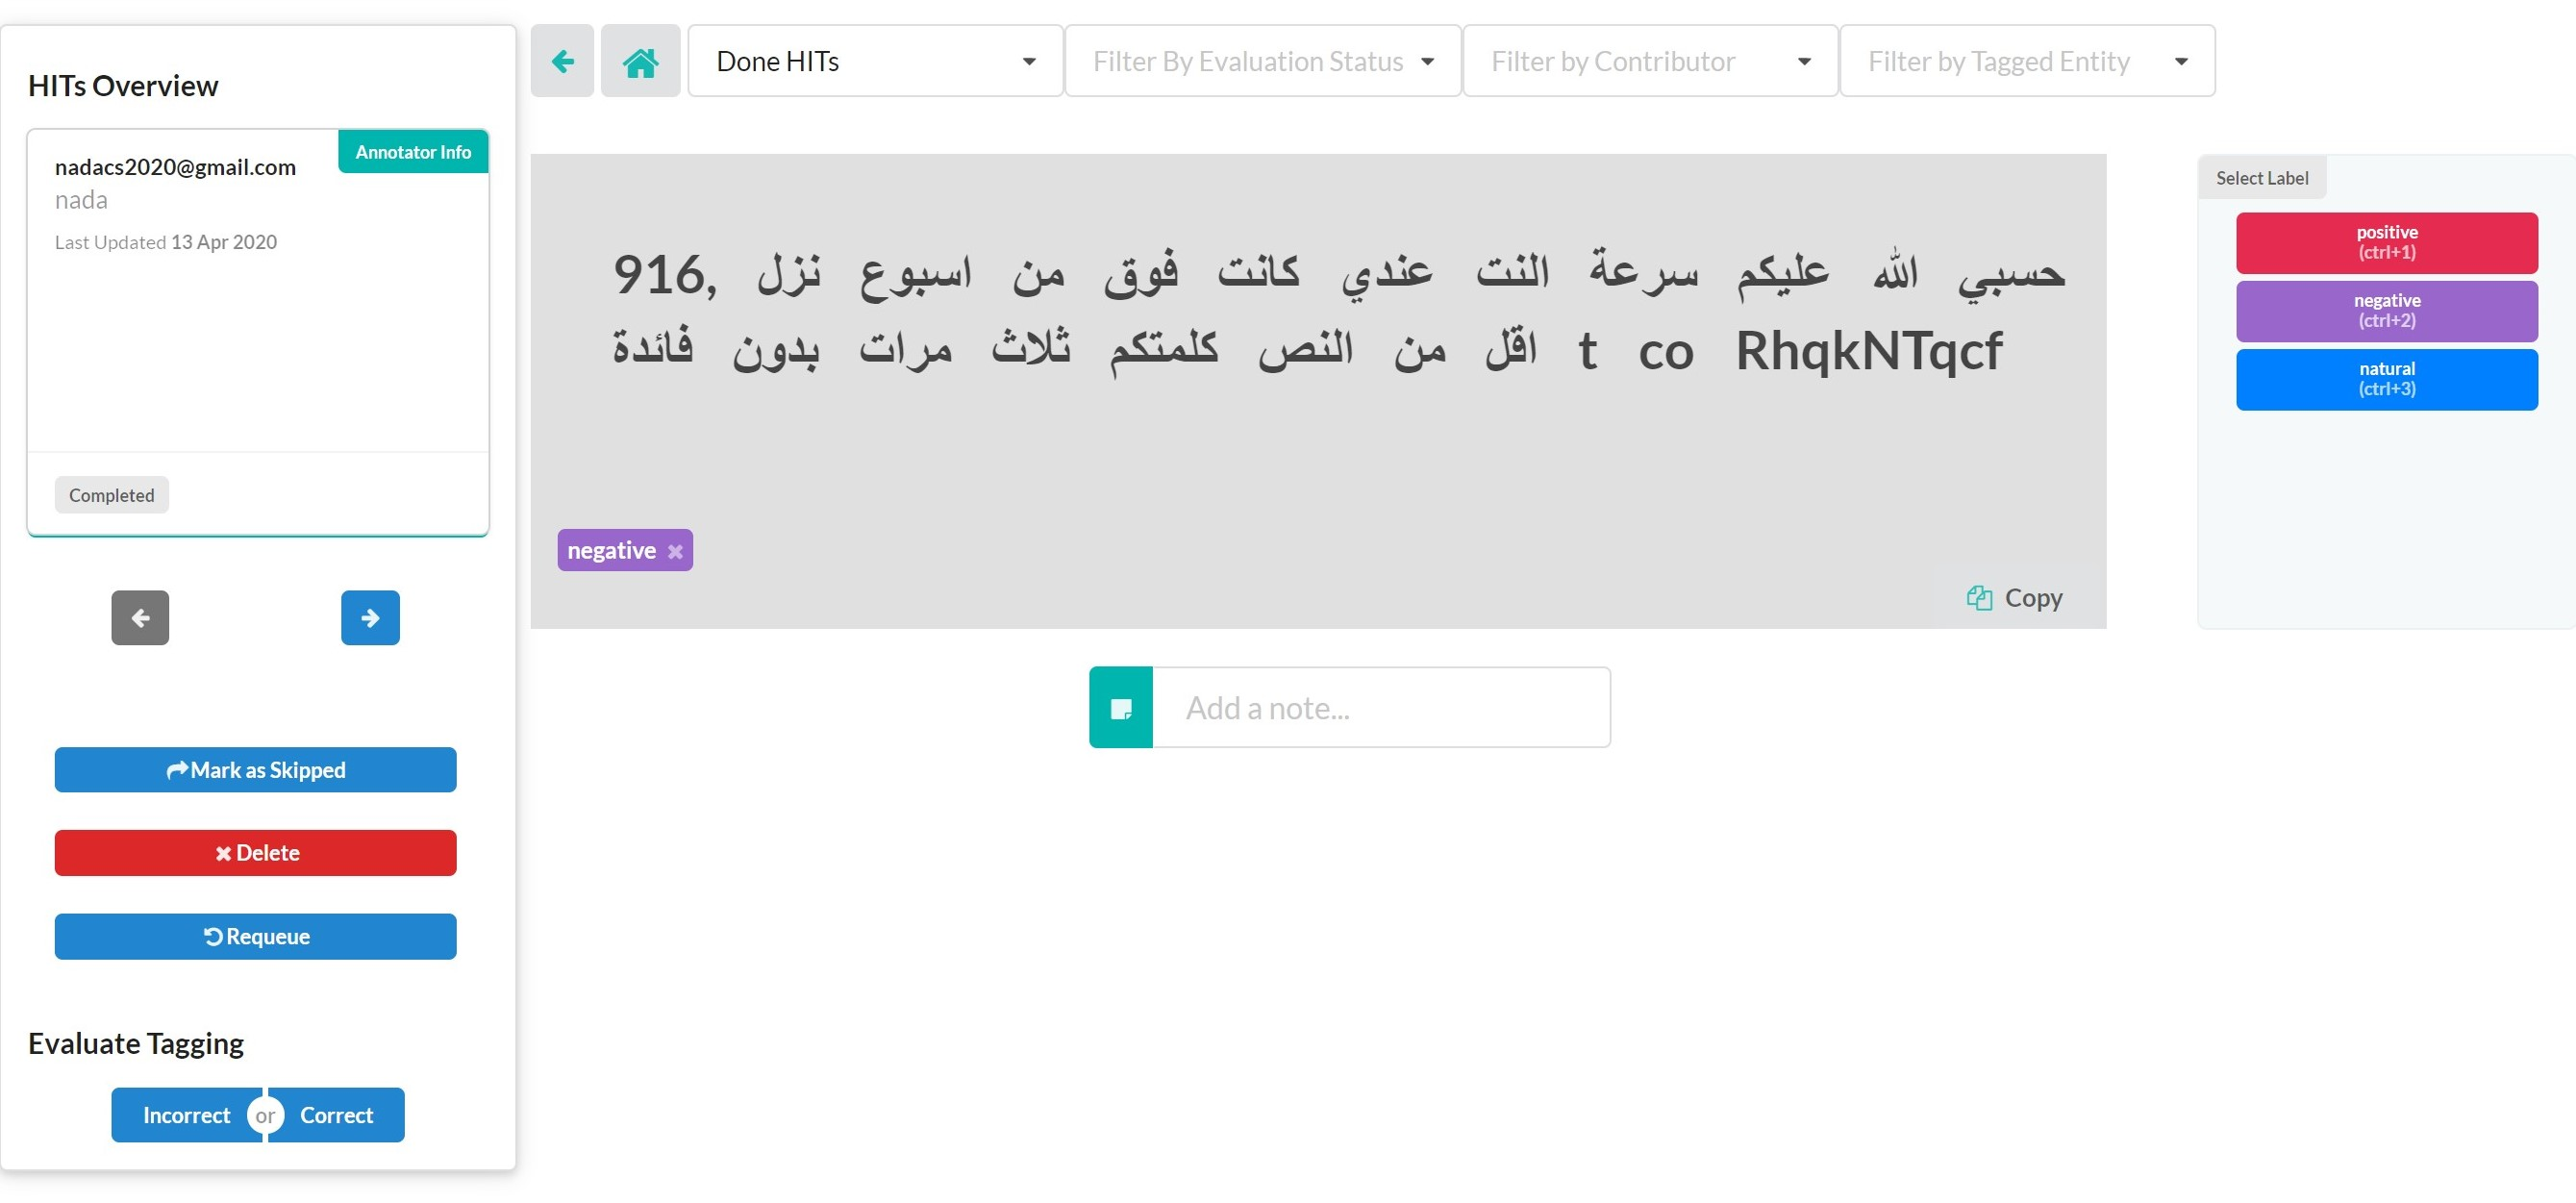

In [11]:
from IPython.display import Image
Image(filename='SharedScreenshot.jpg')

After finishing the data labeling task in dataturks we download a JSON file that contains 2757 tweets and its label. In the nexts step we read this file in python to convertin into pandas dataframe.

In [14]:
tleFile = open("telecom companies.json",'r', encoding="utf-8")
tleData = tleFile.read()
tleFile.close()
tleData = pd.read_json(tleData, lines=True)
tleData.head()

,annotation,content,extras,metadata
0,"{'labels': ['negative'], 'note': ''}","3,شكرا على تعاونكم t co Jba zZyISn",NaN,"{'first_done_at': 1586750670000, 'last_updated..."
1,"{'labels': ['natural'], 'note': ''}","4,اتوقع السؤال واضح ومايحتاج ارسل لكم خاص",NaN,"{'first_done_at': 1586819514000, 'last_updated..."
2,"{'labels': ['natural'], 'note': ''}","6,إلى متى يعني والنت كذا هذا وانا عميل تميز",NaN,"{'first_done_at': 1586825389000, 'last_updated..."
3,"{'labels': ['natural'], 'note': ''}","7,السلام عليكم هل تم تشغيل خدمة الفايبر في مكة",NaN,"{'first_done_at': 1586802980000, 'last_updated..."
4,"{'labels': ['negative'], 'note': ''}","8,لقد تم الابلاغ عن وضع هذه الكبينه المزري منذ...",NaN,"{'first_done_at': 1586731017000, 'last_updated..."


After reading dataset and convert it to dataframe, we show the values of classes that included in our data. The following script show the values inthe annotation column.

In [15]:
tleData.dropna(subset=['annotation'], inplace=True)

tleData['annotation'].value_counts()

{'labels': ['natural'], 'note': ''}                 1743
{'labels': ['negative'], 'note': ''}                 811
{'labels': ['positive'], 'note': ''}                 167
{'labels': ['negative', 'positive'], 'note': ''}       4
{'labels': ['natural', 'positive'], 'note': ''}        2
{'labels': [], 'note': ''}                             2
{'labels': ['positive', 'natural'], 'note': ''}        1
{'labels': ['natural', 'negative'], 'note': ''}        1
{'labels': ['positive', 'negative'], 'note': ''}       1
{'labels': ['negative', 'natural'], 'note': ''}        1
Name: annotation, dtype: int64

the previous script shows that there are some tweets labeled in two classes or in no class. in the following script, we will remove those tweets.

In [16]:
tleData = tleData[tleData.annotation != {'labels': ['negative', 'positive'], 'note': ''} ].copy()
tleData = tleData[tleData.annotation != {'labels': ['natural', 'positive'], 'note': ''} ].copy()
tleData = tleData[tleData.annotation != {'labels': [], 'note': ''} ].copy()
tleData = tleData[tleData.annotation != {'labels': ['positive', 'natural'], 'note': ''} ].copy()
tleData = tleData[tleData.annotation != {'labels': ['natural', 'negative'], 'note': ''} ].copy()
tleData = tleData[tleData.annotation != {'labels': ['positive', 'negative'], 'note': ''}].copy()
tleData = tleData[tleData.annotation != {'labels': ['negative', 'natural'], 'note': ''} ].copy()

Our data set contains 2721 tweets clasified as following:

- 1743 tweets classified as natural.
- 811  tweets classified as negative.
- 167  tweets classified as positive.

In [18]:
tleData.shape

(2721, 4)

In [17]:
tleData['annotation'].value_counts()

{'labels': ['natural'], 'note': ''}     1743
{'labels': ['negative'], 'note': ''}     811
{'labels': ['positive'], 'note': ''}     167
Name: annotation, dtype: int64

In [19]:
tleData = tleData.iloc[:,0:2]

In [21]:
tleData['annotation'] = tleData['annotation'].astype('str').values
tleData['annotation'] = tleData['annotation'].astype('category').values
tleData['annotation'] = tleData['annotation'].cat.codes
tleData['annotation'].value_counts()

0    1743
1     811
2     167
Name: annotation, dtype: int64

In the previous script, we assign each class to numerical value as following:
- 0 ========> natural
- 1 ========> negative
- 2 ========> positive

In [23]:
tleData.head()

,annotation,content
0,1,"3,شكرا على تعاونكم t co Jba zZyISn"
1,0,"4,اتوقع السؤال واضح ومايحتاج ارسل لكم خاص"
2,0,"6,إلى متى يعني والنت كذا هذا وانا عميل تميز"
3,0,"7,السلام عليكم هل تم تشغيل خدمة الفايبر في مكة"
4,1,"8,لقد تم الابلاغ عن وضع هذه الكبينه المزري منذ..."


In [24]:
tleData.content[2]

'6,إلى متى يعني والنت كذا هذا وانا عميل تميز'

In the following script we change the frist column name into sentimentClass

In [25]:
TleSentimentData0 = tleData.copy()

TleSentimentData0.rename({'annotation': 'sentimentClass'}, axis=1, inplace=True)
TleSentimentData0.head()

,sentimentClass,content
0,1,"3,شكرا على تعاونكم t co Jba zZyISn"
1,0,"4,اتوقع السؤال واضح ومايحتاج ارسل لكم خاص"
2,0,"6,إلى متى يعني والنت كذا هذا وانا عميل تميز"
3,0,"7,السلام عليكم هل تم تشغيل خدمة الفايبر في مكة"
4,1,"8,لقد تم الابلاغ عن وضع هذه الكبينه المزري منذ..."


In [26]:
new_tweet =[]
for tweet in TleSentimentData0['content']:
    tweet1 = tweet.replace('"', '').strip()
    new_tweet.append(tweet1)

TleSentimentData0['content'] = new_tweet

In the following script we remove stopwords from our dataset. and reomve some characters that still appear in our data. 

In [33]:
import nltk
nltk.download('stopwords')


afterstopwords = []
from nltk.corpus import stopwords 
stop_words = stopwords.words('arabic')

for text in TleSentimentData0.content:
    tagged_sent = text.split()
    for words in tagged_sent:                           
        chunks = [words for words in tagged_sent if not words in stop_words] 
        
    afterstopwords.append(' '.join(chunks))
TleSentimentData0['content'] = afterstopwords
TleSentimentData0['content'] = TleSentimentData0['content'].apply(lambda x: re.sub('[!@#$:).;,?؟&%]', ' ', x.lower()))
TleSentimentData0['content'] = TleSentimentData0['content'].apply(lambda x: re.sub('[a-zA-Z]', ' ', x.lower()))
TleSentimentData0['content'] = TleSentimentData0['content'].apply(lambda x: re.sub('\d+', ' ', x.lower()))
TleSentimentData0.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\walsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentimentClass,content
0,1,شكرا تعاونكم
1,0,اتوقع السؤال واضح ومايحتاج ارسل خاص
2,0,يعني والنت وانا عميل تميز
3,0,السلام عليكم تم تشغيل خدمة الفايبر مكة
4,1,لقد تم الابلاغ وضع الكبينه المزري طلبتم تحدي...
5,1,انتم تذلونا بالنت شسالفتكم خدمة زينه نت زي ا...
6,1,اللي جيدين الله حسبكم
7,1,م فيييه شبكه شبكه ماااافيه كرهتتتت امسك جوالي
8,1,بطيئين وسيئين شي وترفعون الضغط خدمتكم
9,0,شريحة كويك نت موقفه عندي وش الحل وأنا أسدد أ...


# Models Training

In this technical report, we compare different classifiers, which included:

- Logistic Regression
- Random forest
- Support vector machine (SVM)
- Neural Networks

in the following script we import the required libraries.

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import os

In the following script, we divided our data into two data sets, one for training purposes and the second for testing purposes. 

In [34]:
sentences = TleSentimentData0['content'].values
y = TleSentimentData0['sentimentClass'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=32, stratify=TleSentimentData0.sentimentClass)

In the following step, we build the training matrix and testing matrix. the training matrix will be used as input for classification algorithms. 

In [35]:
from nltk.corpus import stopwords

vectorizer = CountVectorizer(stop_words=stopwords.words('arabic'))
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [36]:
vectorizer.vocabulary_

{'تواصلت': 3002,
 'مافي': 5182,
 'اي': 1922,
 'رد': 3476,
 'ردو': 3484,
 'خاص': 3264,
 'يخوي': 7077,
 'بسرعه': 2311,
 'التحية': 944,
 'والطيب': 6193,
 'معقول': 5554,
 'شركة': 3788,
 'زين': 3582,
 'اكثر': 677,
 'اسبوع': 423,
 'وخدمة': 6441,
 'النت': 1724,
 'الشرائح': 1273,
 'المتعددة': 1543,
 'تعمل': 2837,
 'واكثر': 6105,
 'عشر': 4123,
 'بلاغات': 2407,
 'وزيارة': 6508,
 'للشركه': 4911,
 'وولا': 6903,
 'واحد': 6016,
 'عارف': 4052,
 'يحل': 7058,
 'المشكله': 1618,
 'اين': 1940,
 'حقي': 3225,
 'كعميل': 4555,
 'التمتع': 987,
 'بخدمة': 2237,
 'ادفع': 351,
 'ثمنها': 3056,
 'ريال': 3550,
 'شهريا': 3857,
 'ممكن': 5642,
 'الله': 1513,
 'يسعدك': 7138,
 'يعجبني': 7182,
 'فيكم': 4393,
 'سرعة': 3656,
 'تجاوبكم': 2582,
 'وردكم': 6491,
 'وأنتم': 5974,
 'أفضل': 106,
 'وزارة': 6503,
 'الاتصالات': 752,
 'هيئة': 5957,
 'وأرجو': 5965,
 'تعملوا': 2839,
 'دورات': 3400,
 'لوزارة': 5009,
 'وهيئة': 6896,
 'فن': 4363,
 'التعامل': 962,
 'والرد': 6172,
 'الناس': 1722,
 'كونكم': 4595,
 'أكبر': 113,
 'المملكة': 1673,

# LogisticRegression

the training steps work as following for each classifier:

- Import the classification algorithm.
- Insert the training data into the classification algorithm (fit function).
- Evaluate the build model by asking the model to predict the classes for tweets in the testing set.

In [37]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

C:\Users\walsa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\walsa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.7412844036697248


The following script calculates:

- confusion matrix.
- accuracy.
- precision.
- recall.
- F1 score. 

all of the above terms are common performance metrics.

In [40]:
ynew = classifier.predict(X_test)
print(confusion_matrix(y_test,ynew))
print(classification_report(y_test,ynew))
print(accuracy_score(y_test, ynew))

[[313  30   6]
 [ 83  76   3]
 [ 18   1  15]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       349
           1       0.71      0.47      0.57       162
           2       0.62      0.44      0.52        34

    accuracy                           0.74       545
   macro avg       0.70      0.60      0.63       545
weighted avg       0.73      0.74      0.73       545

0.7412844036697248


# Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.7559633027522936


In [43]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[323  19   7]
 [ 85  74   3]
 [ 19   0  15]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       349
           1       0.80      0.46      0.58       162
           2       0.60      0.44      0.51        34

    accuracy                           0.76       545
   macro avg       0.72      0.61      0.64       545
weighted avg       0.76      0.76      0.74       545

0.7559633027522936


## Support Vector Machine

In [44]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[334  13   2]
 [100  59   3]
 [ 20   0  14]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       349
           1       0.82      0.36      0.50       162
           2       0.74      0.41      0.53        34

    accuracy                           0.75       545
   macro avg       0.76      0.58      0.62       545
weighted avg       0.76      0.75      0.72       545

0.7467889908256881


## Neural Networks (Deep Learning)

In this section, we applied a Deep Learning algorithm, by applied the following steps: 
- import a deep learning algorithm.
- define the utilized layers
- compile our model.
- train our model
- evaluate our model.

In [57]:
input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

In [58]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                73090     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 66        
Total params: 73,156
Trainable params: 73,156
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 2176 samples, validate on 545 samples
Epoch 1/10
2176/2176 [==============================] - 2s 1ms/step - loss: 1.4475 - acc: 0.6383 - val_loss: 1.0815 - val_acc: 0.6404
Epoch 2/10
2176/2176 [==============================] - 1s 579us/step - loss: 0.8825 - acc: 0.6406 - val_loss: 0.7914 - val_acc: 0.6404
Epoch 3/10
2176/2176 [==============================] - 1s 589us/step - loss: 0.6711 - acc: 0.6406 - val_loss: 0.7069 - val_acc: 0.6422
Epoch 4/10
2176/2176 [==============================] - 1s 598us/step - loss: 0.5527 - acc: 0.6567 - val_loss: 0.6770 - val_acc: 0.6679
Epoch 5/10
2176/2176 [==============================] - 1s 667us/step - loss: 0.4172 - acc: 0.8208 - val_loss: 0.6437 - val_acc: 0.7358
Epoch 6/10
2176/2176 [==============================] - 1s 641us/step - loss: 0.2502 - acc: 0.9324 - val_loss: 0.6741 - val_acc: 0.7394
Epoch 7/10
2176/2176 [==============================] - 1s 609us/step - loss: 0.1802 - acc: 0.9508 - val_loss: 0.7131 - val_acc: 0.7523
Epo

In [60]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9812
Testing Accuracy:  0.7505


In [61]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

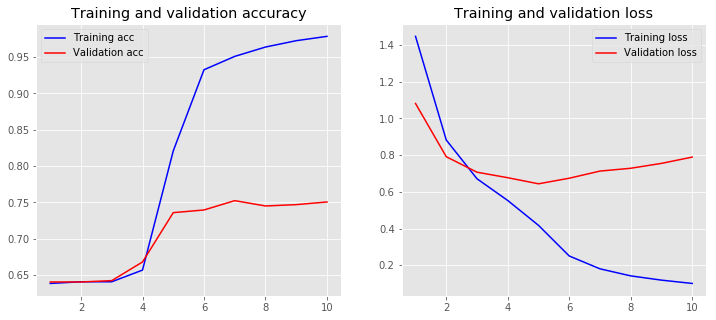

In [62]:
plot_history(history)


#  Comparision Results 

|  CLASSIFIERS |  ACCURACY | PRECISION | RECALL | F1 SCORE   |
|---|---|---|---|---|
|  LogisticRegression |  0.741 |  0.73 | 0..74  | 0.73  |
|  Random forest | 0.755  |  0.76 | 0.76  |0.74   |
|   SVM | 0.746  |   0.76|0.75   |0.72   |
|   Neural Networks | 0.75  |   